# Tarea: Vecinos Cercanos

---

### Círculos

24 de Noviembre de 2016

In [2]:
from sklearn import preprocessing, svm
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors  #for unsupervised
from sklearn.neighbors import KNeighborsRegressor #for supervised (the case now :) )

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

from random import random, randint, seed, sample
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pda
import numpy as np


In [3]:
dfcirc = pda.read_csv("../datos_clase/circulos2.csv")
dfcirc.head()

,X1,X2,circ
0,4.920075,7.165015,1
1,-8.372233,9.507193,0
2,6.471259,7.022859,1
3,2.766320,-6.639282,0
4,2.902020,0.315803,0


In [4]:
x1 = dfcirc[dfcirc.columns[:2]]
y1 = dfcirc[dfcirc.columns[2]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.75)

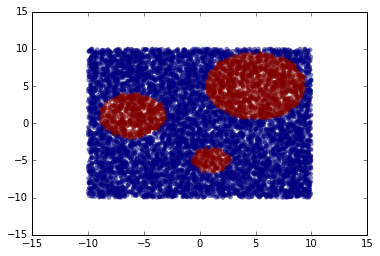

In [5]:
plt.scatter(dfcirc['X1'], dfcirc['X2'], c = dfcirc['circ'], 
            edgecolor = 'none',
            alpha = 0.5)

## K Neighbors

In [6]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x1_train, y1_train)
fit_knn_train = knn.predict(x1_train)
fit_knn_test = knn.predict(x1_test)

In [7]:
confusion_matrix(y1_test, fit_knn_test)
print 'Accuracy Score = ', metrics.accuracy_score(y1_test, fit_knn_test)

Accuracy Score =  0.9916


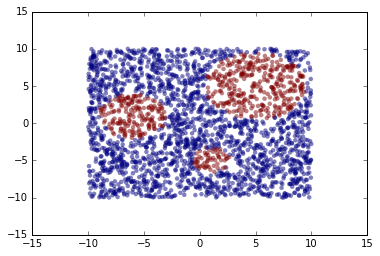

In [8]:
plt.scatter(x1_test['X1'], x1_test['X2'], c = fit_knn_test, 
            edgecolor = 'none',
            alpha = 0.5)

## SVM

In [89]:
svm_circ = svm.SVC(kernel="rbf", probability=True, C=.3)
svm_circ.fit(x1_train, y1_train)  
fit_train = svm_circ.predict(x1_train)
fit_test = svm_circ.predict(x1_test)

In [90]:
confusion_matrix(y1_train, fit_train)
confusion_matrix(y1_test, fit_test)
print 'Accuracy Score = ', metrics.accuracy_score(y1_test, fit_test)

Accuracy Score =  0.9892


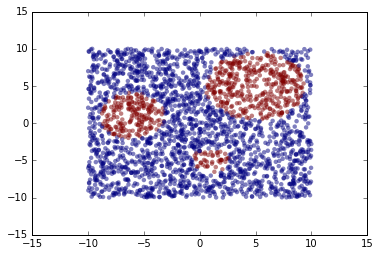

In [91]:
plt.scatter(x1_test['X1'], x1_test['X2'], c = fit_test, 
            edgecolor = 'none',
            alpha = 0.5)